<a href="https://colab.research.google.com/github/JishnuJayaraj/ML/blob/master/NLP/_TrendDetection/Copy_of_TrendDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df= pd.read_json('/content/drive/My Drive/RokinData/ToBeCleaned.json.gz')
df.dropna(axis=0, inplace=True)
df.drop_duplicates('title', inplace=True)
df.dropna(subset=['title'], inplace=True)

df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
df = df[(df['date'] > '2019-01-01')]

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97429 entries, 0 to 615530
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype              
---  ------            --------------  -----              
 0   date              97429 non-null  datetime64[ns, UTC]
 1   title             97429 non-null  object             
 2   text              97429 non-null  object             
 3   url               97429 non-null  object             
 4   lastCrawlTimeUTC  97429 non-null  int64              
dtypes: datetime64[ns, UTC](1), int64(1), object(3)
memory usage: 4.5+ MB


In [3]:
df.reset_index(drop=True, inplace=True)

In [4]:
# drop unnecessary columns
to_drop = ['url', 'lastCrawlTimeUTC', 'text']

df.drop(to_drop, axis=1, inplace=True)

# save to pickle
df.to_pickle('/content/drive/My Drive/RokinData/from2019.pkl')

## Loadding data

In [5]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipywidgets import interactive

# %matplotlib inline

pd.set_option('display.max_colwidth', None)

# df = pd.read_json('/content/Car_IoT_Cybersecurity.json')
# df = pd.read_json('/content/carIotcyberCorona.json')
df = pd.read_pickle('/content/drive/My Drive/RokinData/from2019.pkl')

df.drop_duplicates('title', inplace=True,)
df.dropna(subset=['title'], inplace=True)

df.info() # datetim obj necessary*

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97429 entries, 0 to 97428
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype              
---  ------  --------------  -----              
 0   date    97429 non-null  datetime64[ns, UTC]
 1   title   97429 non-null  object             
dtypes: datetime64[ns, UTC](1), object(1)
memory usage: 2.2+ MB


In [ ]:
# df.drop(['date','text','url','unknown'], axis=1, inplace=True)
# df.drop(['text','url','unknown'], axis=1, inplace=True)

In [ ]:
!pip install ipympl

In [7]:
# check date column is datetime object, convert if needed
date_columns = df.select_dtypes(include=[np.datetime64])
print(list(date_columns))

# convert to date time
# df['date'] = pd.to_datetime(df['date'], errors = 'coerce')
# df = df.dropna().reset_index(drop=True)
# df = df.query('date_new != "NaT"')

[]


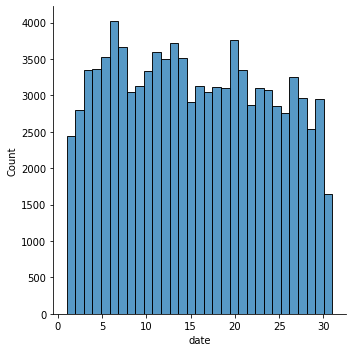

interactive(children=(Dropdown(description='x', options=('Y', '6M', '3M', '1M', '2W', '1W'), value='Y'), Outpu…

In [8]:
# check if days and month were swaped (must be uniformly distributed plot)
import seaborn as sns
import matplotlib.pyplot as plt
days = df['date'].dt.day
sns.displot(days, kde= False, bins = 31)
plt.show()


# plot number of articles Yearwise
columns=['Y','6M','3M', '1M', '2W', '1W']
def g(x):
    df['date'].value_counts().resample(x).sum().plot.line()
    plt.show()
interactive_plot = interactive(g, x=columns)
interactive_plot


In [12]:
# slice the date if needed
# df.query('date > "2015-06-01"', inplace=True)
df['date'] = df['date'].dt.tz_localize(None)
df.query('date > "2019-01-01" & date < "2020-04-01"', inplace=True)

# sort the index, 0 - n-1, and drop prev index
df.reset_index(drop=True, inplace=True)

## USE 

In [13]:
import tensorflow as tf
import tensorflow_hub as hub

module_url = "https://tfhub.dev/google/universal-sentence-encoder/4"
model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
# sentence bert

# !pip install sentence-transformers
# from sentence_transformers import SentenceTransformer
# model = SentenceTransformer('distilbert-base-nli-mean-tokens')
# embeddings = model.encode(data, show_progress_bar=True)

In [14]:
train_embeddings = model(df.title)

## Clustering

In [15]:
!pip install hdbscan

import hdbscan
import numpy as np
# import matplotlib.pyplot as plt

# dim reduction
import umap

     |████████████████████████████████| 4.7MB 2.7MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for hdbscan: filename=hdbscan-0.8.26-cp36-cp36m-linux_x86_64.whl size=2301762 sha256=50697680ce4899219bdcb58277ce6fd954dbefb92cd7323b57ee6c1ab318c18c
  Stored in directory: /root/.cache/pip/wheels/82/38/41/372f034d8abd271ef7787a681e0a47fc05d472683a7eb088ed
Successfully built hdbscan


### dim reduction

In [ ]:
# clusterable_embedding = umap.UMAP(n_neighbors=10,
#     min_dist=0.0,
#     n_components=10,
#     random_state=42,
#     metric='cosine'
# ).fit_transform(train_embeddings)

clusterable_embedding = umap.UMAP(n_neighbors=3,min_dist=0.0,n_components=10,random_state=42,metric='cosine'
).fit_transform(train_embeddings)

In [ ]:
# plot the embedding

# !pip install umap-learn[plot]

# import umap.plot
# import pandas as pd
# import datashader as ds
# import datashader.transfer_functions as tf
# import datashader.bundling as bd
# import matplotlib.pyplot as plt
# import colorcet
# import matplotlib.colors
# import matplotlib.cm
# import bokeh.plotting as bpl
# import bokeh.transform as btr
# import holoviews as hv
# import holoviews.operation.datashader as hd

# umap.plot.points(clusterable_embedding) 
# labels = cluster values
# umap.plot.plt.show()

### Optimum parameter tuning

The optimum value of min_pts is :  12.0


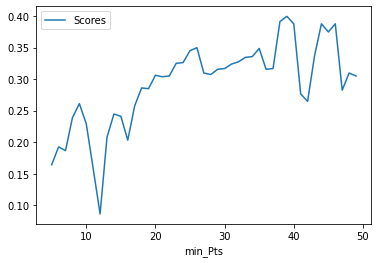

In [ ]:
# minimize the un clustered number usin probability
import numpy as np


scores = []
min_pts = []

for i in range(5,50):

  clusterer = hdbscan.HDBSCAN(min_samples=i)
  clusterer.fit(clusterable_embedding)
  
  all_prob = clusterer.probabilities_

  # Count odd numbers in the list
  count_niche = sum(map(lambda x : x <= 0.5, all_prob))

  # fraction with low confid
  score = count_niche/len(all_prob)

  scores.append(score)
  min_pts.append(i)


percentile_list = pd.DataFrame(np.column_stack([min_pts, scores]),columns=['min_Pts', 'Scores'])
index = percentile_list['Scores'].idxmin()
row = percentile_list.iloc[index]

print('The optimum value of min_pts is : ', row[0])
# plot score vs min pts
import matplotlib.pyplot as plt

# plt.plot(min_pts,scores)
percentile_list.plot(x='min_Pts', y='Scores', kind = 'line')

### run clustering

In [ ]:
#min_samples 10
clusterer = hdbscan.HDBSCAN(min_samples=12)

clusterer.fit(clusterable_embedding)


HDBSCAN(algorithm='best', allow_single_cluster=False, alpha=1.0,
        approx_min_span_tree=True, cluster_selection_epsilon=0.0,
        cluster_selection_method='eom', core_dist_n_jobs=4,
        gen_min_span_tree=False, leaf_size=40,
        match_reference_implementation=False, memory=Memory(location=None),
        metric='euclidean', min_cluster_size=5, min_samples=12, p=None,
        prediction_data=False)

### data exploration

In [ ]:
# clusterer.labels_.max()
from collections import Counter
Counter(clusterer.labels_)

# clusterer.single_linkage_tree_.plot()

# island plot
# clusterer.condensed_tree_.plot()

Counter({-1: 72,
         0: 20,
         1: 284,
         2: 106,
         3: 222,
         4: 48,
         5: 16,
         6: 8,
         7: 16,
         8: 40,
         9: 14})

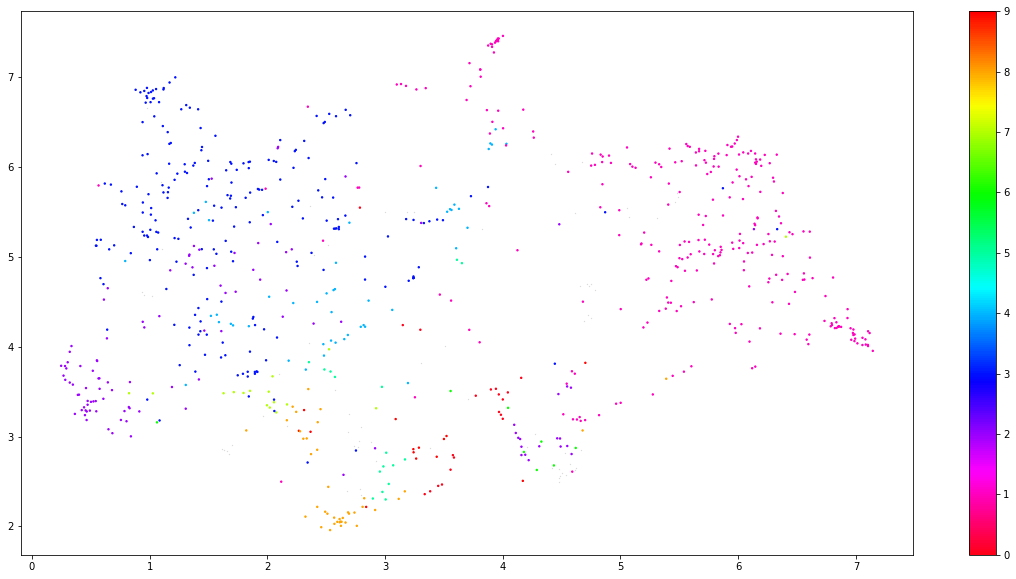

In [ ]:
#  plot the umap 2d
import matplotlib.pyplot as plt

# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(train_embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = clusterer.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=2, cmap='hsv_r')
plt.colorbar()

## Append result to dataframe

In [ ]:
df.loc[:,'hdbscan_Clusters'] = None
df.loc[:,'hdbscan_Clusters'] = clusterer.labels_

In [ ]:
# ipywidget 
import ipywidgets as widgets

max_cluster = clusterer.labels_.max()
cluster_slider = widgets.IntSlider(value=5, max=max_cluster,description='Cluster no:')
display(cluster_slider)

# clusterer.labels_
# clusterer.probabilities_

IntSlider(value=5, description='Cluster no:', max=9)

In [ ]:
df.query('hdbscan_Clusters == @cluster_slider.value')

,date,title,hdbscan_Clusters
80,2016-09-22,Autodesk Launches PDM-in-the-Cloud to Bolster PLM Solution – Finally,5
81,2016-08-30,"Autodesk Records Strong Second Quarter, Beats Guidance",5
102,2018-01-22,Bosch Rexroth demonstrates uses IoT screw solutions,5
105,2018-01-19,Bosch inaugurates IoT hub in Berlin,5
106,2017-06-20,Bosch invests €1bn in IoT technology,5
120,2016-08-19,CIMdata Report Shows Dassault Systèmes is a PLM Revenue Leader in 2015,5
160,2017-03-09,Dassault Systèmes Releases Three New Solutions for the Retail Industry,5
263,2016-11-22,Honeywell Brings New Offerings through Collaboration on IIoT Solutions,5
347,2019-04-04,"LPT: Controls and Drives – Hitachi Composite Cables, Sigmatek DC Motor Module& More",5
432,2018-09-19,PLM & Design Re-Use: Model Searching Works for Norden Machinery,5


# Time series

In [ ]:
!pip install moda

In [ ]:
df.rename(columns={'hdbscan_Clusters':'category', 'title':'value'}, inplace = True)

In [ ]:
# group by year month

# ls.dropna().reset_index(drop=True, inplace = True)/
# ls = df.query('date != "NaT"')

# step 1: create a 'year-month' column
# ls['dates'] = ls['date'].map(lambda x: x.strftime('%Y/%m'))

# step 2: group by the created columns
# grouped_df = ls.groupby('dates').size()

# grouped_df

In [ ]:
from moda.dataprep import raw_to_ts


# this changes the dataframe !!!!!!!!!!!
ts = raw_to_ts(df)
ts.head()

,value,category,timestamp
date,,,
2019-12-19,'Inconsistent and misleading' password meters could increase risk of cyber attacks,2,1576713600
2018-12-28,10 biggest robotics stories of 2018,1,1545955200
2018-12-24,10 most funded robotics companies of 2018,1,1545609600
2019-01-09,10 robotics companies to watch in 2019,1,1546992000
2019-07-09,20 largest robotics investments during 1st half of 2019,1,1562630400


In [ ]:
# add widget to select parameter and custom dates

In [ ]:
## Some general stats

print("Dataset length: " + str(len(ts)))
print("Min date: " + str(ts.index.get_level_values('date').min()))
print("Max date: " + str(ts.index.get_level_values('date').max()))

print("Total time: {}".format(ts.index.get_level_values('date').max() - ts.index.get_level_values('date').min()))

print("Dataset contains {} categories.".format(len(ts['category'].unique())))

Dataset length: 846
Min date: 2015-07-02 00:00:00
Max date: 2020-04-08 18:00:00
Total time: 1742 days 18:00:00
Dataset contains 11 categories.


In [ ]:
from moda.dataprep import ts_to_range
TIME_RANGE = "2M"                                     # Aggregate all events in the raw data into 3month intervals
ranged_ts = ts_to_range(ts,time_range=TIME_RANGE)
ranged_ts.head(20)
# value:  is the number of articles belonging to that particular category

value
date       category       
2015-07-31  1          1.0
2015-09-30  1          0.0
            3          1.0
2015-11-30 -1          1.0
            0          2.0
            1          2.0
            2          1.0
            3          0.0
            5          1.0
            7          1.0
2016-01-31 -1          0.0
            0          0.0
            1          5.0
            2          0.0
            3          0.0
            5          0.0
            7          0.0
            8          1.0
            9          2.0
2016-03-31 -1          2.0

In [ ]:
# view articles in seected cluster
display(cluster_slider)
df.query('category == @cluster_slider.value').sort_values(by=['date'])

# filter_1 = df.query('category == @cluster_slider.value')
# filter_1.sort_values(by=['date'], inplace=True)
# filter_1.reset_index(drop=True, inplace=True)
# filter_1.tail()

IntSlider(value=5, description='Cluster no:', max=9)

,value,category,timestamp
date,,,
2015-11-20,PLM This Week: Dassault Systèmes Releases End-to-End Solution for BioPharma,5,1447977600
2016-02-12,SolidWorks PDM Gets Integrated with Arena,5,1455235200
2016-02-19,PLM This Week: European Spallation Source Selects the 3DEXPERIENCE,5,1455840000
2016-06-20,PTC’s New AgileWorx is an Industry-First Agile Software Solution,5,1466380800
2016-08-08,PLM This Week: Autodesk Uses Machine Learning to Find Part Models,5,1470614400
2016-08-19,CIMdata Report Shows Dassault Systèmes is a PLM Revenue Leader in 2015,5,1471564800
2016-08-30,"Autodesk Records Strong Second Quarter, Beats Guidance",5,1472515200
2016-09-22,Autodesk Launches PDM-in-the-Cloud to Bolster PLM Solution – Finally,5,1474502400
2016-11-22,Honeywell Brings New Offerings through Collaboration on IIoT Solutions,5,1479772800


## widget

In [ ]:
# ipywidget 
# import ipywidgets as widgets

# max_cluster = clusterer.labels_.max()
# cluster_slider = widgets.IntSlider(value=5, max=max_cluster,description='Cluster no:')
display(cluster_slider)

from datetime import datetime

# start_date = datetime(2015, 1, 1)                                # make this block global and user input <----------------------------
# end_date = datetime(2020, 5, 1)                                  

start_date = ts.index.get_level_values('date').min()
end_date = ts.index.get_level_values('date').max()

dates = pd.date_range(start_date, end_date, freq=TIME_RANGE)

options = [(date.strftime(' %d %b %Y '), date) for date in dates]
index = (0, len(options)-1)


selection_range_slider = widgets.SelectionRangeSlider(
    options=options,
    index=index,
    description='Dates',
    orientation='horizontal',
    layout={'width': '500px'}
)

selection_range_slider

IntSlider(value=5, description='Cluster no:', max=9)

SelectionRangeSlider(description='Dates', index=(0, 28), layout=Layout(width='500px'), options=((' 31 Jul 2015…

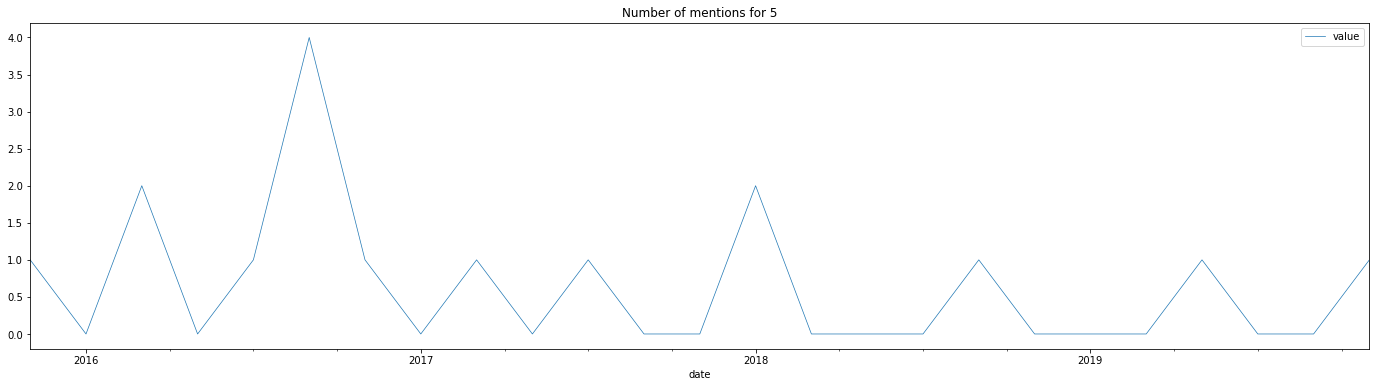

In [ ]:
# growth of particular category/cluster
category = cluster_slider.value
ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index().plot(kind='line',x='date',y='value',figsize=(24,6),linewidth=0.7, 
                          title = "Number of mentions for {}".format(category))

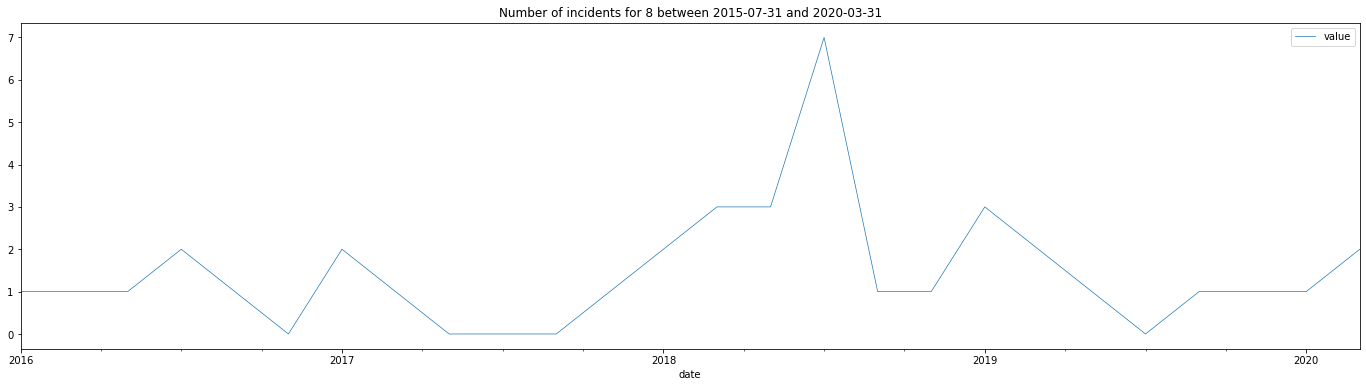

In [ ]:
# Custom date
# START = '2015-11-01'
# END = '2018-07-01'
START = str(selection_range_slider.value[0])[:10]
END = str(selection_range_slider.value[1])[:10]

category = 8
cleaning = ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index()
cleaning[(cleaning.date > START) & (cleaning.date<=END)].plot(kind='line',x='date',y='value',figsize=(24,6),linewidth=0.7, 
                          title = "Number of incidents for {0} between {1} and {2}".format(category,START,END))

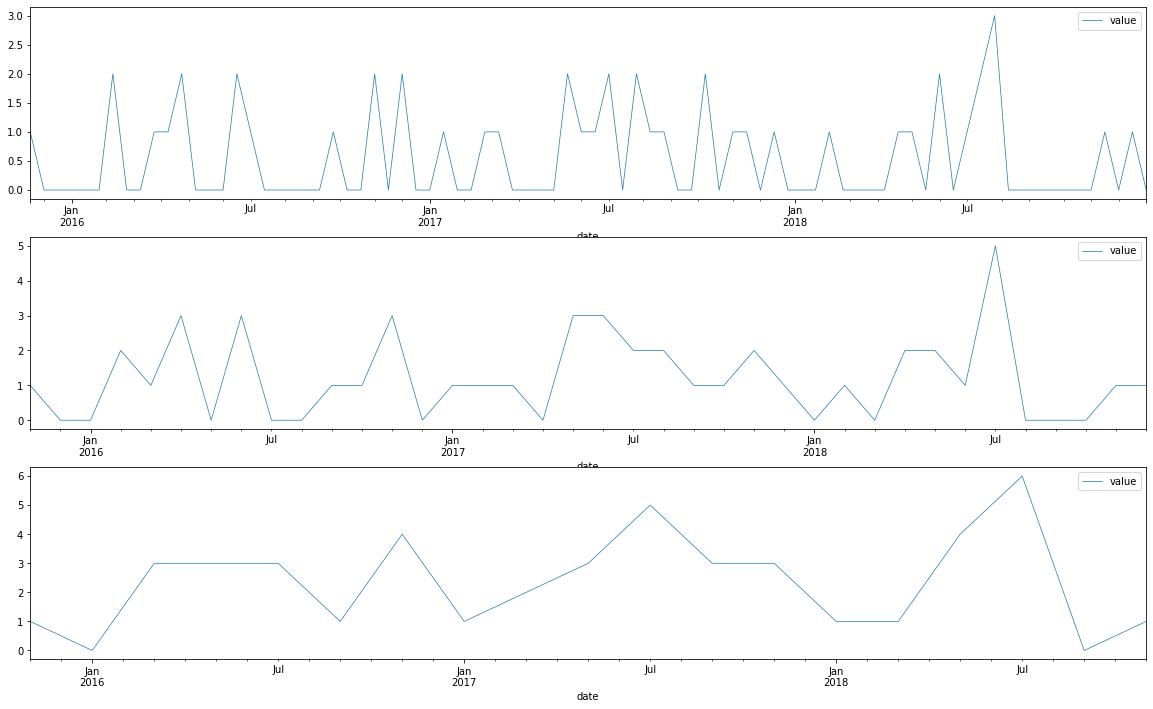

In [ ]:
# from moda.dataprep.ts_to_range import ts_to_range

ranged_ts_3H = ts_to_range(ts,time_range='1M',pad_with_zeros=True)
ranged_ts_30min = ts_to_range(ts,time_range='2W',pad_with_zeros=True)

START = '2015-11-01'
END = '2019-01-01'
category = 2

fig, axes = plt.subplots(nrows=3, ncols=1,figsize=(20,12))

cleaning_30min = ranged_ts_30min.loc[pd.IndexSlice[:, category], :].reset_index()
a1=cleaning_30min[(cleaning_30min.date > START) & (cleaning_30min.date<=END)].plot(kind='line',x='date',y='value',linewidth=0.7, ax=axes[0])

cleaning_3H = ranged_ts_3H.loc[pd.IndexSlice[:, category], :].reset_index()
a2=cleaning_3H[(cleaning_3H.date > START) & (cleaning_3H.date<=END)].plot(kind='line',x='date',y='value',linewidth=0.7, ax=axes[1])

cleaning_24H = ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index()
a3=cleaning_24H[(cleaning_24H.date > START) & (cleaning_24H.date<=END)].plot(kind='line',x='date',y='value',linewidth=0.7, ax=axes[2])

Filtered dataset contains 11 categories,
after filtering the small ones that existed less than 10 days or had 5 values of less.


IndexError: ignored

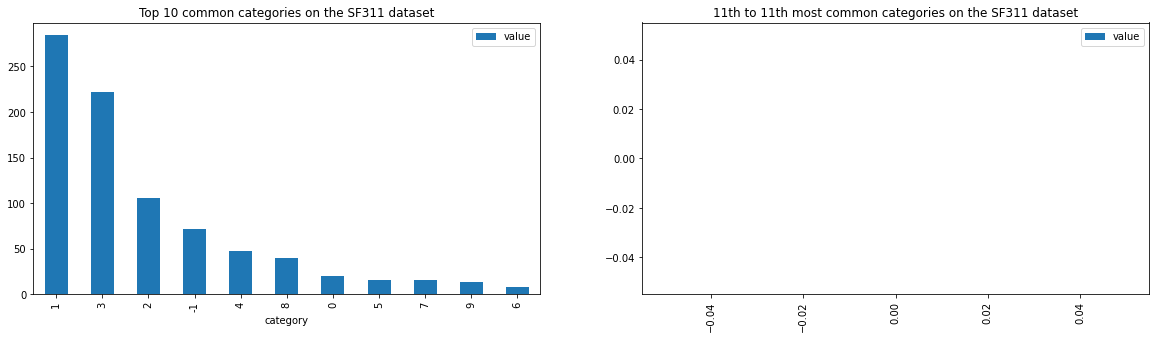

In [ ]:
# common categories
!pip install dfply
from dfply import *
import matplotlib.pyplot as plt
## Remove categories with less than 1000 items (in more than 10 years) or that existed less than 100 days
min_values = 5
min_days = 10



categories = ranged_ts.reset_index() >> group_by(X.category) >> \
    summarise(value = np.sum(X.value),duration_in_dataset = X.date.max()-X.date.min()) >> \
    ungroup() >> \
    mask(X.duration_in_dataset.dt.days > min_days) >> \
    mask(X.value > min_values) >> \
    arrange(X.value,ascending=False)



print("Filtered dataset contains {0} categories,\nafter filtering the small ones that existed less than {1} days or had {2} values of less.".
      format(len(categories),min_days,min_values))

categories.head()

category_names = categories['category'].values
num_categories = len(categories)

major_category_threshold=11
major_categories = category_names[:major_category_threshold]
minor_categories = category_names[major_category_threshold:]

fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_figheight(5)
fig.set_figwidth(20)

categories[categories['category'].isin(major_categories)].plot(kind='bar',
                                                               x='category',
                                                               y='value',
                                                               title="Top "+str(major_category_threshold-1)+" common categories on the SF311 dataset",
                                                               ax=axes[0])
categories[categories['category'].isin(minor_categories)].plot(kind='bar',
                                                               x='category',
                                                               y='value',
                                                               title=str(major_category_threshold)+"th to "+str(num_categories)+"th most common categories on the SF311 dataset",
                                                               ax=axes[1])

plt.savefig("category_values.png",bbox_inches='tight')

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3704: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3710: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


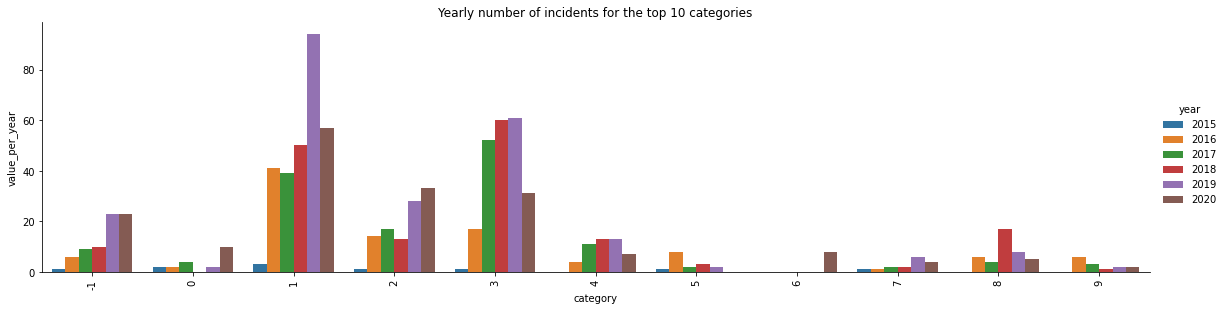

In [ ]:

## Calculate the number of values per category per year
categories_yearly = ranged_ts.reset_index() >> mutate(year = X.date.dt.year) >> group_by(X.category,X.year) >> \
    summarise(value_per_year = np.sum(X.value),
              duration_in_dataset = X.date.max()-X.date.min()) >>\
    ungroup() >> \
    mask(X.value_per_year > (min_values/12.0)) >> \
    arrange(X.value_per_year,ascending=False)

import seaborn as sns

major_cats_yearly = categories_yearly[categories_yearly['category'].isin(major_categories)]

g = sns.factorplot(x='category', y='value_per_year', hue='year', data=major_cats_yearly, kind='bar', size=4, aspect=4,legend=True)
g.set_xticklabels(rotation=90)
axes = g.axes.flatten()
axes[0].set_title("Yearly number of incidents for the top "+str(major_category_threshold-1)+" categories")
plt.savefig("yearly_values.png",bbox_inches='tight')

In [ ]:
# do it for monthly basis

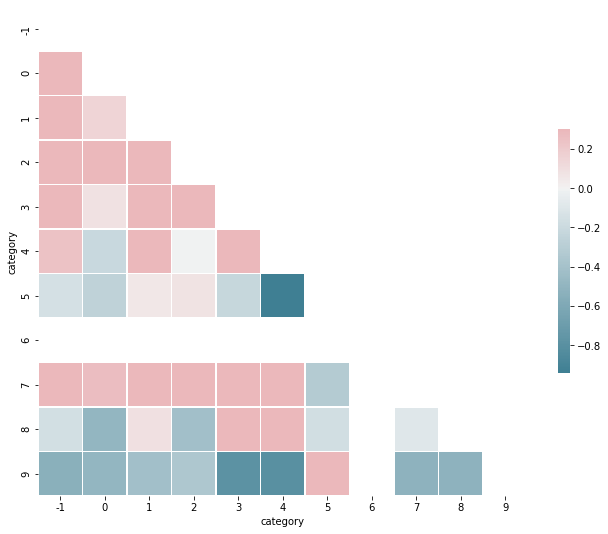

In [ ]:
categories_yearly_pivot = categories_yearly.pivot("year", "category", "value_per_year")
categories_yearly_pivot.head()
corr = categories_yearly_pivot.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# Summarization

In [ ]:
!pip install pytextrank
!pip install git+https://github.com/LIAAD/yake
import yake

import spacy
nlp = spacy.load("en_core_web_sm")
import pytextrank

# add PyTextRank to the spaCy pipeline
tr = pytextrank.TextRank()
nlp.add_pipe(tr.PipelineComponent, name="textrank", last=True)

# Yake
language = "en"
max_ngram_size = 3
deduplication_thresold = 0.9
deduplication_algo = 'seqm'
windowSize = 4                    # <----
numOfKeywords = 20

kw_extractor = yake.KeywordExtractor(lan=language, n=max_ngram_size, dedupLim=deduplication_thresold, dedupFunc=deduplication_algo, windowsSize=windowSize, top=numOfKeywords, features=None)


  Cloning https://github.com/LIAAD/yake to /tmp/pip-req-build-p2gfp0a1
  Running command git clone -q https://github.com/LIAAD/yake /tmp/pip-req-build-p2gfp0a1
  Created wheel for yake: filename=yake-0.4.3-py2.py3-none-any.whl size=65942 sha256=2fd9598b1dfabf6a2d1dd1b3ee68520bbe537787237b9d9d61e2b045085319a9
  Stored in directory: /tmp/pip-ephem-wheel-cache-cth_3u4p/wheels/be/35/27/e4ebd54b78c1806ed8b0271ce247fcd91e2bedde35889fbc9b
Successfully built yake


In [ ]:
# max_cluster = clusterer.labels_.max()
# print('Max cluster size is: ', max_cluster)

In [ ]:
display(cluster_slider)

algorithm_radio_button = widgets.RadioButtons(
    options=['TextRank', 'Yake'], value='TextRank',description='Algorithm:',disabled=False)
display(algorithm_radio_button)

selection_range_slider

IntSlider(value=5, description='Cluster no:', max=9)

RadioButtons(description='Algorithm:', options=('TextRank', 'Yake'), value='TextRank')

SelectionRangeSlider(description='Dates', index=(0, 28), layout=Layout(width='500px'), options=((' 31 Jul 2015…

In [ ]:
begin = str(selection_range_slider.value[0])[:10]
end = str(selection_range_slider.value[1])[:10]

# selected_articles = df.loc[(df.hdbscan_Clusters == cluster_slider.value) & (df.date < end) & (df.date > begin) ]
selected_articles = df.loc[(df.category == cluster_slider.value) & (df.index < end) & (df.index > begin) ]

text = '.'.join(selected_articles.value)  # join all to single list

if algorithm_radio_button.value == 'TextRank':
  doc = nlp(text)
  for p in doc._.phrases:
    print("{}  {:.4f} {:5d} ".format(p.text,p.rank, p.count))
else:
  keywords = kw_extractor.extract_keywords(text)
  for kw in keywords:
	  print(kw)
   
text

autonomous driving tech  0.0849     1 
self driving cars  0.0814     1 
autonomous vehicle investments  0.0802     1 
waymo autonomous vehicles  0.0793     1 
autonomous vehicle tech  0.0779     1 
autonomous vehicle funding  0.0775     1 
autonomous vehicle safety  0.0773     2 
autonomous vehicle researchers  0.0770     1 
vehicles?.why autonomous vehicles  0.0761     1 
autonomous vehicle exemption  0.0761     1 
autonomous vehicle night vision  0.0731     1 
autonomous vehicle research center  0.0719     1 
nuro r2 autonomous delivery vehicle  0.0706     1 
futuristic autonomous car cabin  0.0697     1 
first self-driving vehicles  0.0659     1 
self-driving vehicles  0.0653     3 
waymo self-driving vehicles  0.0653     1 
electric vehicles  0.0647     1 
self-driving car technologies  0.0644     1 
waymo self-driving cars  0.0643     1 
self-driving car services  0.0639     1 
self-driving car race  0.0639     1 
self-driving car efforts  0.0638     1 
self-driving car drama  0.0

'10 biggest robotics stories of 2018.10 most funded robotics companies of 2018.10 robotics companies to watch in 2019.20 largest robotics investments during 1st half of 2019.2019 IW Tech Survey: Robots Hot; IIoT Not.5 Must-Ask Questions When Developing Robots.5 Robots Walmart is Testing for Retail Innovation.5 things robots do better than humans (and 3 things they don’t).6 Autonomous mobile robot trends to watch.6 River Systems acquisition: Mobile robots a must in new economy.6 industries where demand for robotics developers will grow by 2025.A (Rather Slow) Ride in the First Self-Driving Chevy Bolt.A Western View of PLM in China: The Eastern Innovation Tiger is Ready to Pounce.A projector had far too much fun with car tech.AI-Powered IIoT Solution to Help Manage and Monitor Aging Bridges, Tunnels, Highways and Railways.AUTO SHOW: Can Tesla Still Lead Electric Car Race? It Wants To.Affectiva Automotive AI Helps Cars Monitor Your Emotions.Amazon keeps on truckin’ with autonomous vehicle

In [ ]:
# df.loc[(df.category == -1) & (df.index < end) & (df.index > begin) ].sort_values(by=['date'])
df.loc[(df.category == cluster_slider.value) & (df.index < end) & (df.index > begin) ].sort_values(by=['date'])


,value,category,timestamp
date,,,
2019-01-18 00:00:00,TV Report: “Turning PLM on Its Head” – Meet Dassault’s New Generation Leader Olivier Ribet,0,1547769600
2019-03-19 00:00:00,Standardizing the ADAS Lexicon,0,1552953600
2020-03-19 09:26:00,Pricer: Update on Possible Effects of the Coronavirus (COVID-19),0,1584609960
2020-03-24 21:30:00,"Village Farms International to Host Year End 2019 Conference Call on Tuesday, March 31, 2020 at 8:30 a.m. ET / Company Provides COVID-19 Update: All Facilities Remain Open",0,1585085400
2020-03-25 06:51:00,Volvo Provides an Update on the Current Situation in Respect of COVID-19 and Postpones the Annual General Meeting,0,1585119060
2020-03-26 20:15:00,Farmer Mac CEO Provides COVID-19 Business Update,0,1585253700
2020-03-30 10:45:00,CONSOL Operations Update at Bailey Mine and Response to COVID-19 Cases,0,1585565100
2020-03-30 12:33:00,Stoneridge Provides Business Updates Related to COVID-19,0,1585571580
2020-03-30 21:21:00,Scientific Games Statement on COVID-19 Response,0,1585603260


## class based TF idf

In [ ]:
# c tf odf

docs_df = df.copy()
docs_df.reset_index(inplace=True)
docs_df.drop(['timestamp', 'date'], axis=1, inplace=True)
docs_df.rename(columns={'value':'Doc', 'category':'Topic'}, inplace = True)
docs_df.index.name = 'Doc_ID'
docs_df

docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

# docs_per_topic



In [ ]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer

def c_tf_idf(documents, m, ngram_range=(1, 2)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(docs_df))

In [ ]:
# Topic representation

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words

def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic'])
                     .Doc
                     .count()
                     .reset_index()
                     .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                     .sort_values("Size", ascending=False))
    return topic_sizes

top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

In [ ]:
top_n_words[1][:20]

In [ ]:
# topic reduction
# merging the topic vectors that were most similar to each other.

from sklearn.metrics.pairwise import cosine_similarity

for i in range(20):
    # Calculate cosine similarity
    similarities = cosine_similarity(tf_idf.T)
    np.fill_diagonal(similarities, 0)

    # Extract label to merge into and from where
    topic_sizes = docs_df.groupby(['Topic']).count().sort_values("Doc", ascending=False).reset_index()
    topic_to_merge = topic_sizes.iloc[-1].Topic
    topic_to_merge_into = np.argmax(similarities[topic_to_merge + 1]) - 1

    # Adjust topics
    docs_df.loc[docs_df.Topic == topic_to_merge, "Topic"] = topic_to_merge_into
    old_topics = docs_df.sort_values("Topic").Topic.unique()
    map_topics = {old_topic: index - 1 for index, old_topic in enumerate(old_topics)}
    docs_df.Topic = docs_df.Topic.map(map_topics)
    docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

    # Calculate new topic words
    m = len(docs_df)
    tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m)
    top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)

topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

## Moda (to delet3)

In [ ]:
pip install moda

In [ ]:
import pandas as pd
ls = pd.read_csv('/content/catalog.csv')
ls['date'].head()

In [ ]:
# Parsing
# %d for day, %m for month, %y for a two-digit year and %Y for a four digit year
# infer_datetime_format=True, dates in different formats
ls['date_new'] = pd.to_datetime(ls['date'], errors = 'coerce')
ls['date_new'].head()

In [ ]:
# check if day-month reversed
days = ls['date_new'].dt.day
import seaborn as sns

sns.displot(days, kde= False, bins = 31)

In [ ]:
ls.info()

In [ ]:
# group by year month

# ls.dropna().reset_index(drop=True, inplace = True)/
ls = ls.query('date_new != "NaT"')

# step 1: create a 'year-month' column
ls['dates'] = ls['date_new'].map(lambda x: x.strftime('%Y/%m'))

# step 2: group by the created columns
grouped_df = ls.groupby('dates').size()

grouped_df

In [ ]:
ls.info()
# ls

In [ ]:
# without using the datetime format
df1 = ls[['date','landslide_type','trigger']]
df1.rename(columns={'landslide_type':'category', 'trigger':'value'}, inplace = True)
df1

In [ ]:
TIME_RANGE = "6M" # Aggregate all events in the raw data into 3 hour intervals
from moda.dataprep import raw_to_ts

ts = raw_to_ts(df1)
ts.head()

In [ ]:
## Some general stats

print("Dataset length: " + str(len(ts)))
print("Min date: " + str(ts.index.get_level_values('date').min()))
print("Max date: " + str(ts.index.get_level_values('date').max()))

print("Total time: {}".format(ts.index.get_level_values('date').max() - ts.index.get_level_values('date').min()))

print("Dataset contains {} categories.".format(len(ts['category'].unique())))

In [ ]:

from moda.dataprep import ts_to_range
ranged_ts = ts_to_range(ts,time_range=TIME_RANGE)
ranged_ts.head(20)

In [ ]:
category = "Landslide"
ranged_ts.loc[pd.IndexSlice[:, category], :].reset_index().plot(kind='line',x='date',y='value',figsize=(24,6),linewidth=0.7, 
                          title = "Number of incidents per 24 hours for {}".format(category))

# Export for visualization

In [ ]:
# export for visualisation

np.savetxt('out.tsv', clusterable_embedding ,delimiter='\t')

# Save dataframe without any index
df.to_csv('metadata.tsv', index=False, sep='\t')

# https://projector.tensorflow.org/

In [ ]:
# TextRank keywords

ab = str(df['title'].iloc[0]) + str(df['text'].iloc[0])
do = nlp(ab)
for p in do._.phrases:
  print("{}  {:.4f} {:5d} ".format(p.text,p.rank, p.count))

In [ ]:
# YAKE
keywords = kw_extractor.extract_keywords(ab)
for kw in keywords:
	  print(kw)

In [ ]:
# florrians keywords
keyphrase_matrix = pd.read_json('/content/Car_IoT_Cybersecurity_bert2tag_kp50_09.28_11.43.json')

keyphrase_matrix.loc[0]
# %whos